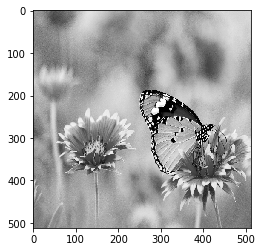

In [0]:
import cv2
import scipy.misc
import matplotlib.pyplot as plt

bgr_img=cv2.imread('flower.jpeg')
gray_img=cv2.cvtColor(bgr_img,cv2.COLOR_BGR2GRAY)
small_img = cv2.resize(gray_img, (512,512))
small_img=small_img.astype("float32")/255
plt.imshow(small_img,cmap='gray')
plt.show()

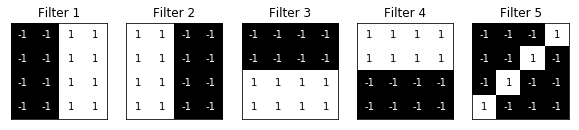

In [0]:
import numpy as np

filter_vals=np.array([[-1, -1, 1, 1],
                      [-1, -1, 1, 1],
                      [-1, -1, 1, 1],
                      [-1, -1, 1, 1]])
filter_1=filter_vals
filter_2=-filter_1
filter_3=filter_1.T
filter_4=-filter_3
filter_5=np.array([[-1, -1, -1, 1],
                   [-1, -1, 1, -1],
                   [-1, 1, -1, -1],
                   [1, -1, -1, -1]])
filters=[filter_1,filter_2,filter_3,filter_4,filter_5]

fig=plt.figure(figsize=(10,5))
for i in range(5):
  ax=fig.add_subplot(1,5,i+1,xticks=[],yticks=[])
  ax.imshow(filters[i],cmap='gray')
  ax.set_title('Filter %s' % str(i+1))
  width,height=filters[i].shape
  for x in range(width):
    for y in range(height):
      ax.annotate(str(filters[i][x][y]),xy=(y,x),horizontalalignment='center',verticalalignment='center',color='white' if filters[i][x][y]<0 else 'black')

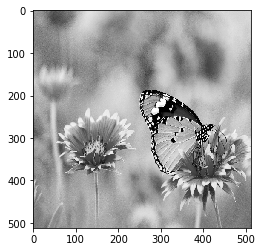

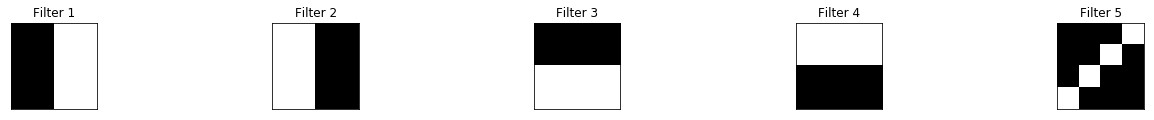

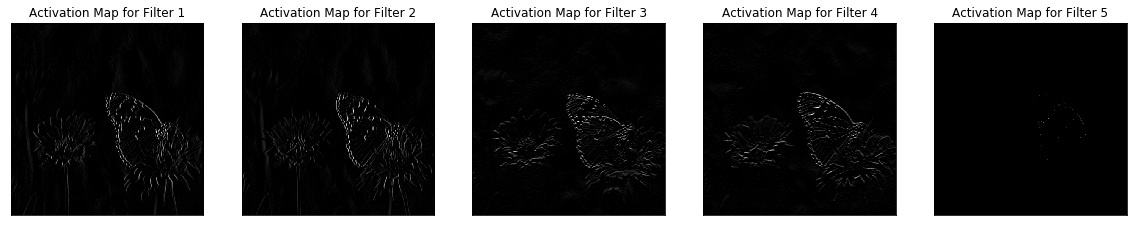

In [0]:
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D
import matplotlib.cm as cm

plt.imshow(small_img,cmap='gray')

model=Sequential()
model.add(Convolution2D(1,(4,4),activation='relu',input_shape=(small_img.shape[0],small_img.shape[1],1)))

def apply_filter(img,index,filter_list,ax):
  model.layers[0].set_weights([np.reshape(filter_list[i],(4,4,1,1)),np.array([0])])
  ax.imshow(np.squeeze(model.predict(np.reshape(img,(1,img.shape[0],img.shape[1],1)))),cmap='gray')

fig=plt.figure(figsize=(12,6))
fig.subplots_adjust(left=0,right=1.5,bottom=0.8,top=1,hspace=0.05,wspace=0.05)
for i in range(5):
  ax=fig.add_subplot(1,5,i+1,xticks=[],yticks=[])
  ax.imshow(filters[i],cmap='gray')
  ax.set_title('Filter %s' % str(i+1))

fig=plt.figure(figsize=(20,20))
for i in range(5):
  ax=fig.add_subplot(1,5,i+1,xticks=[],yticks=[])
  apply_filter(small_img,i,filters,ax)
  ax.set_title('Activation Map for Filter %s' % str(i+1))